# Model `BinaryMFPenalty`

In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# from generators import BlockDiagonalMatrixGenerator

# n_row, n_col, k, seed = 300, 500, 5, None

# data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.2, 0.1, 0.2, 0.1])
# data.generate(seed=seed) # if no seed assigned, use time instead

# data.show_matrix(title="gen_diag_sorted")

In [8]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

idx = data.sample(factor_id=0, n_samples=300)
idx = data.sample(factor_id=1, n_samples=500)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1713341625
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1713341625
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [9]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 5848
[I]   val_size     : 836
[I]   test_size    : 1671
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 141645
[I]   n_negatives  : 8355
[I]   train_size   : 5848
[I]   val_size     : 836
[I]   test_size    : 1671
[I]   seed         : 2023


In [10]:
from models import BinaryMFThresholdExCollective

k = 5
us, vs = 0.01, 0.01
# W = 'full'
W = 'mask'
init_method = 'nmf_sklearn'

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThresholdExCollective(k=k, us=us, vs=vs, W=W, init_method=init_method)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=True, display=False)

TypeError: __init__() got an unexpected keyword argument 'us'

# Visualize F

In [49]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

N = 10
dpi = 1000

100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


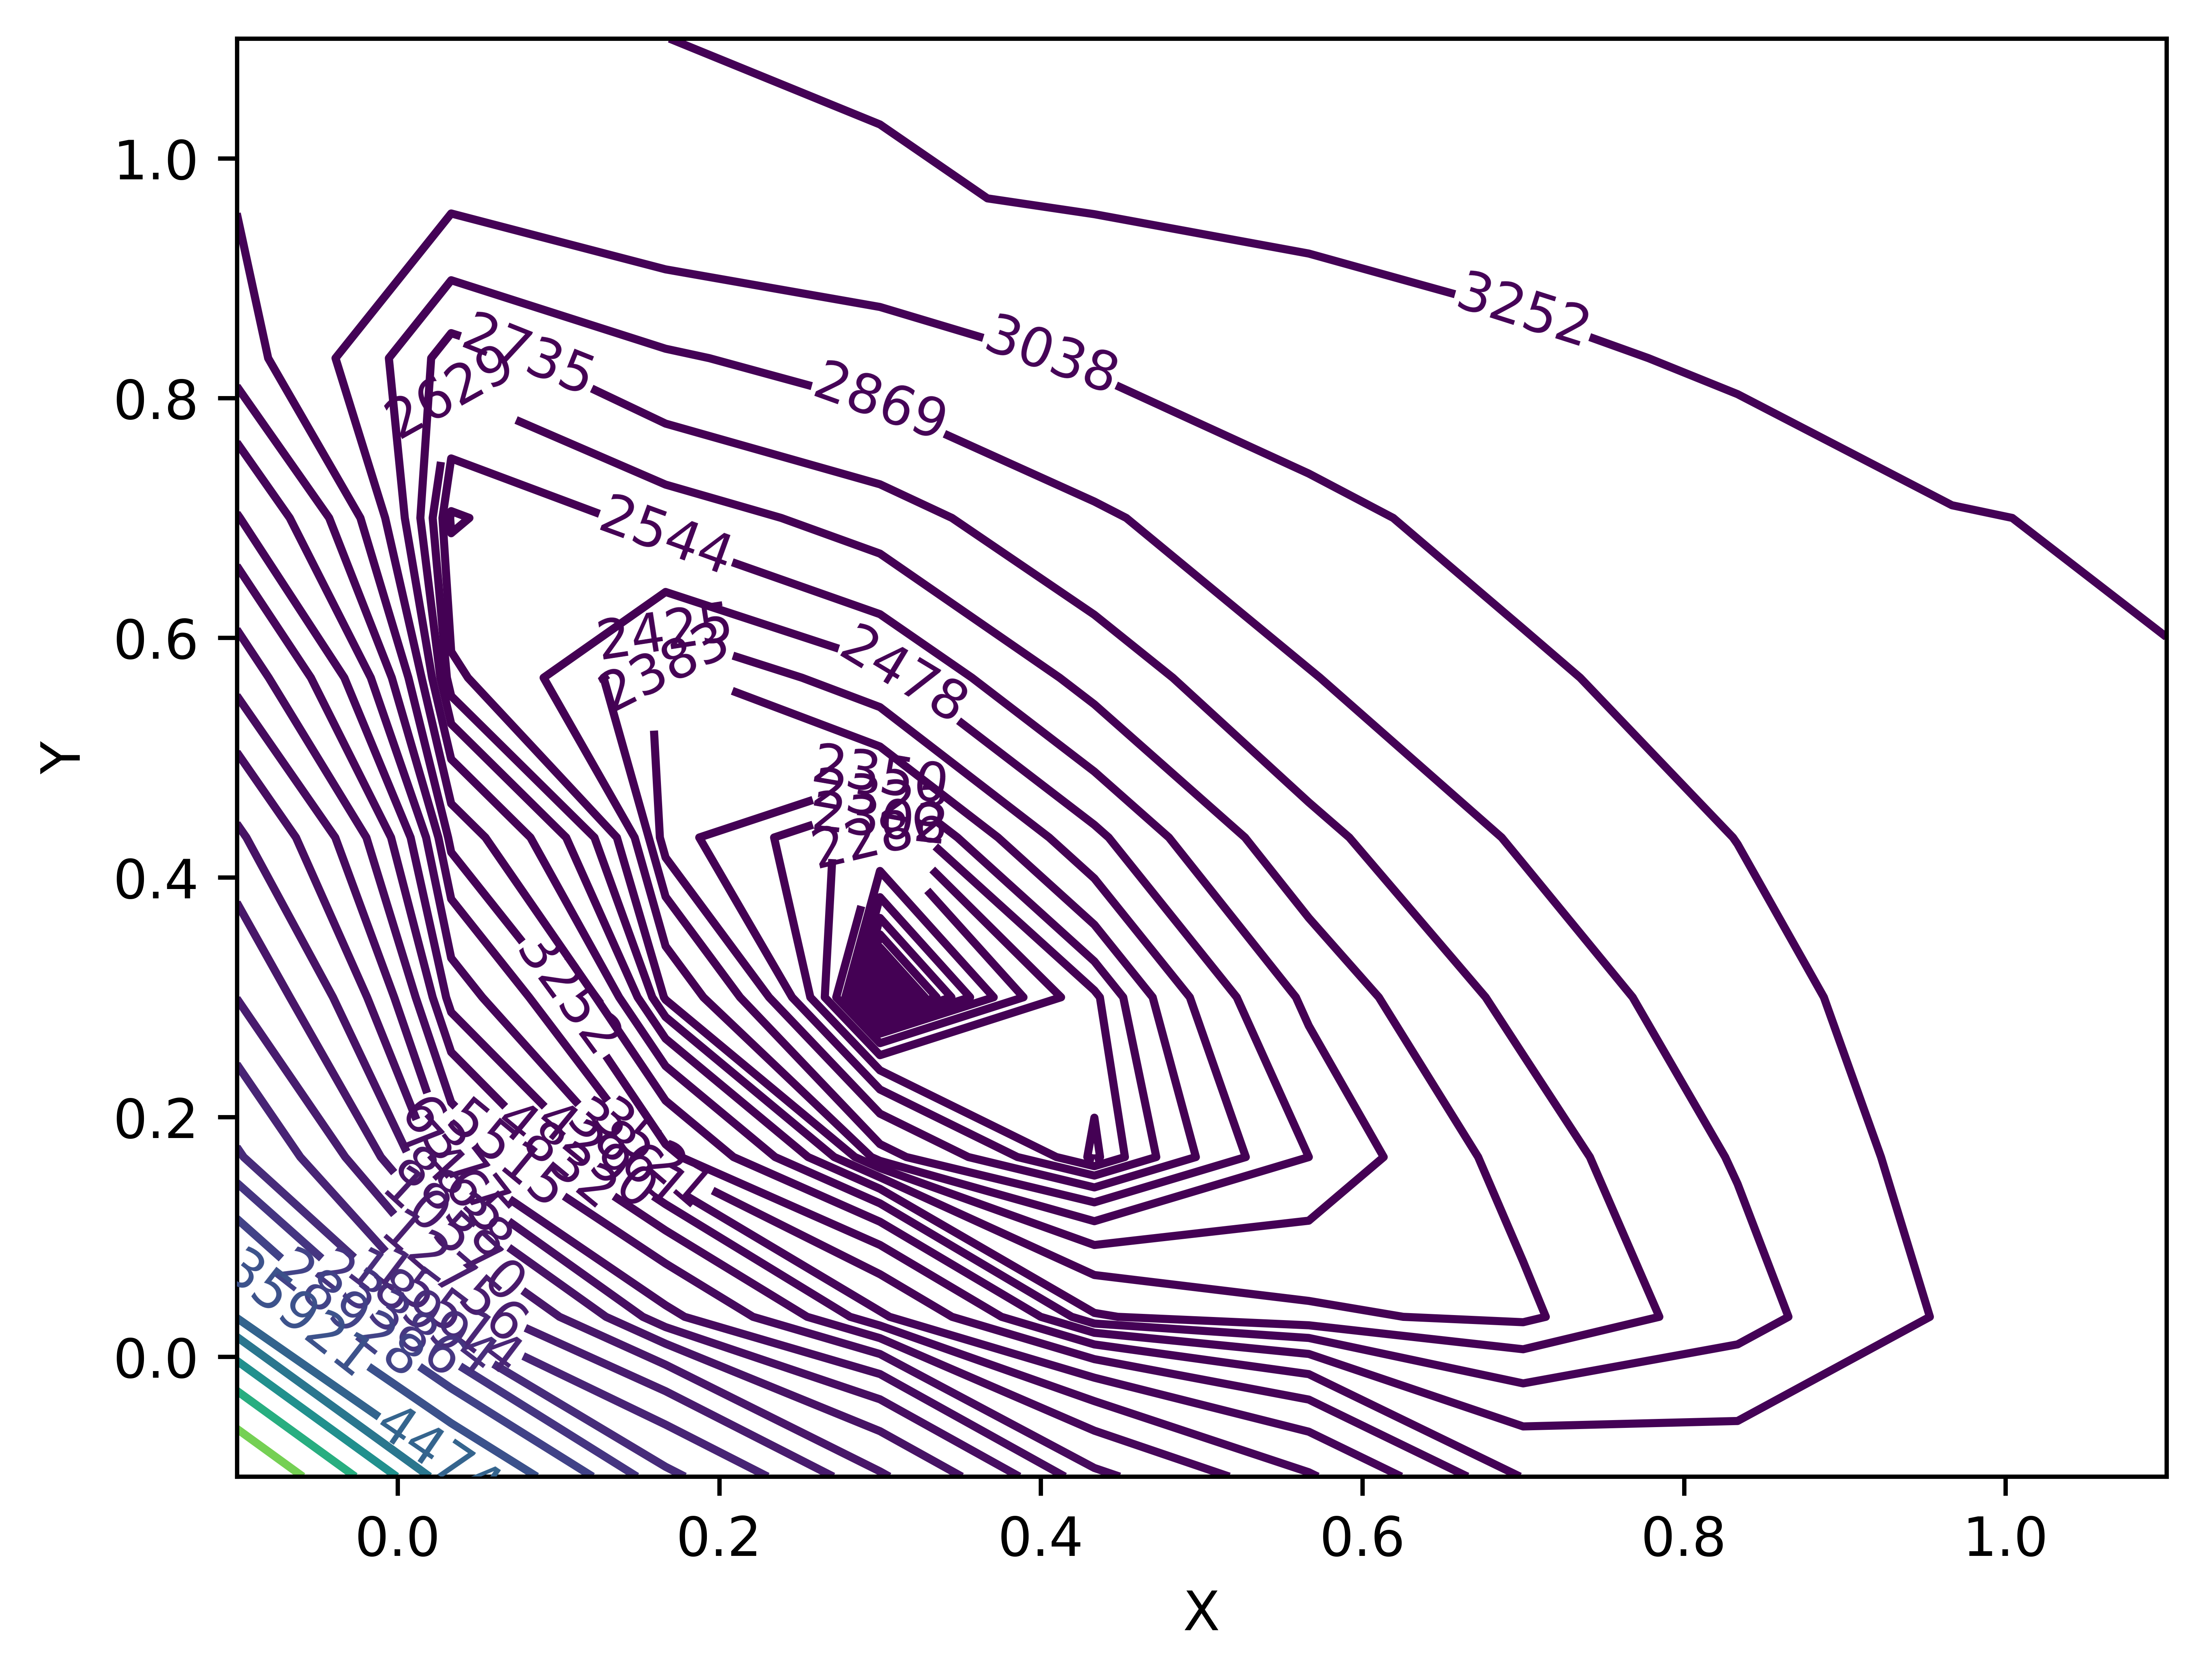

In [50]:
x = np.linspace(-0.1, 1.1, N)
y = np.linspace(-0.1, 1.1, N)
Z = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in tqdm(range(N)):
    for j in range(N):
        params = [X[i, j]] * k + [Y[i, j]] * k
        Z[i, j] = model.F(params)
        
# fig = plt.figure(dpi=dpi)
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='hot')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')

levels = np.logspace(0, 10, num=100, endpoint=True, base=10)
levels = (levels - levels.min()) / (levels.max() - levels.min())
levels = levels * (Z.max() - Z.min()) + Z.min()

plt.figure(dpi=dpi)
cp = plt.contour(X, Y, Z, levels=levels)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Visualize dF

In [48]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]


IndexError: list index out of range